In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

from itertools import combinations

import researchpy as rp

plt.rcParams['figure.figsize'] = (10, 5)
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("data/supermarket_2.pkl")

In [3]:
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,total,date,time,payment,rating,month,shift
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,9.1,January,Morning
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,9.6,March,Morning
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,7.4,March,Morning
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,8.4,January,Afternoon
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,5.3,February,Morning


ShapiroResult(statistic=0.9087592959403992, pvalue=5.303152934088987e-24)


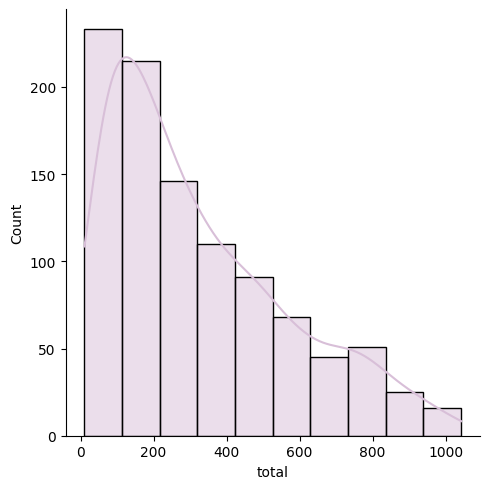

In [4]:
# EVALUACIÓN DE ASUNCIONES: Cada asunción la deberéis testar de forma visual y analítica.

# NORMALIDAD:
#Visual
print (stats.shapiro(df["total"]))
sns.displot(df["total"], kde = True, color = "thistle", bins=10);

In [5]:
#Analítica
#nuestros datos tienen un p-value menos de 0.05 por lo que no son normales.
stats.shapiro(df["total"])

ShapiroResult(statistic=0.9087592959403992, pvalue=5.303152934088987e-24)

#### Homocedasticidad

<Axes: xlabel='city', ylabel='total'>

<Axes: xlabel='customer_type', ylabel='total'>

<Axes: xlabel='gender', ylabel='total'>

<Axes: xlabel='product_line', ylabel='total'>

<Axes: xlabel='payment', ylabel='total'>

<Axes: xlabel='quantity', ylabel='total'>

<Axes: xlabel='month', ylabel='total'>

<Axes: xlabel='shift', ylabel='total'>

Text(0.5, 1.0, 'Variables predictivas homocedasticidad')

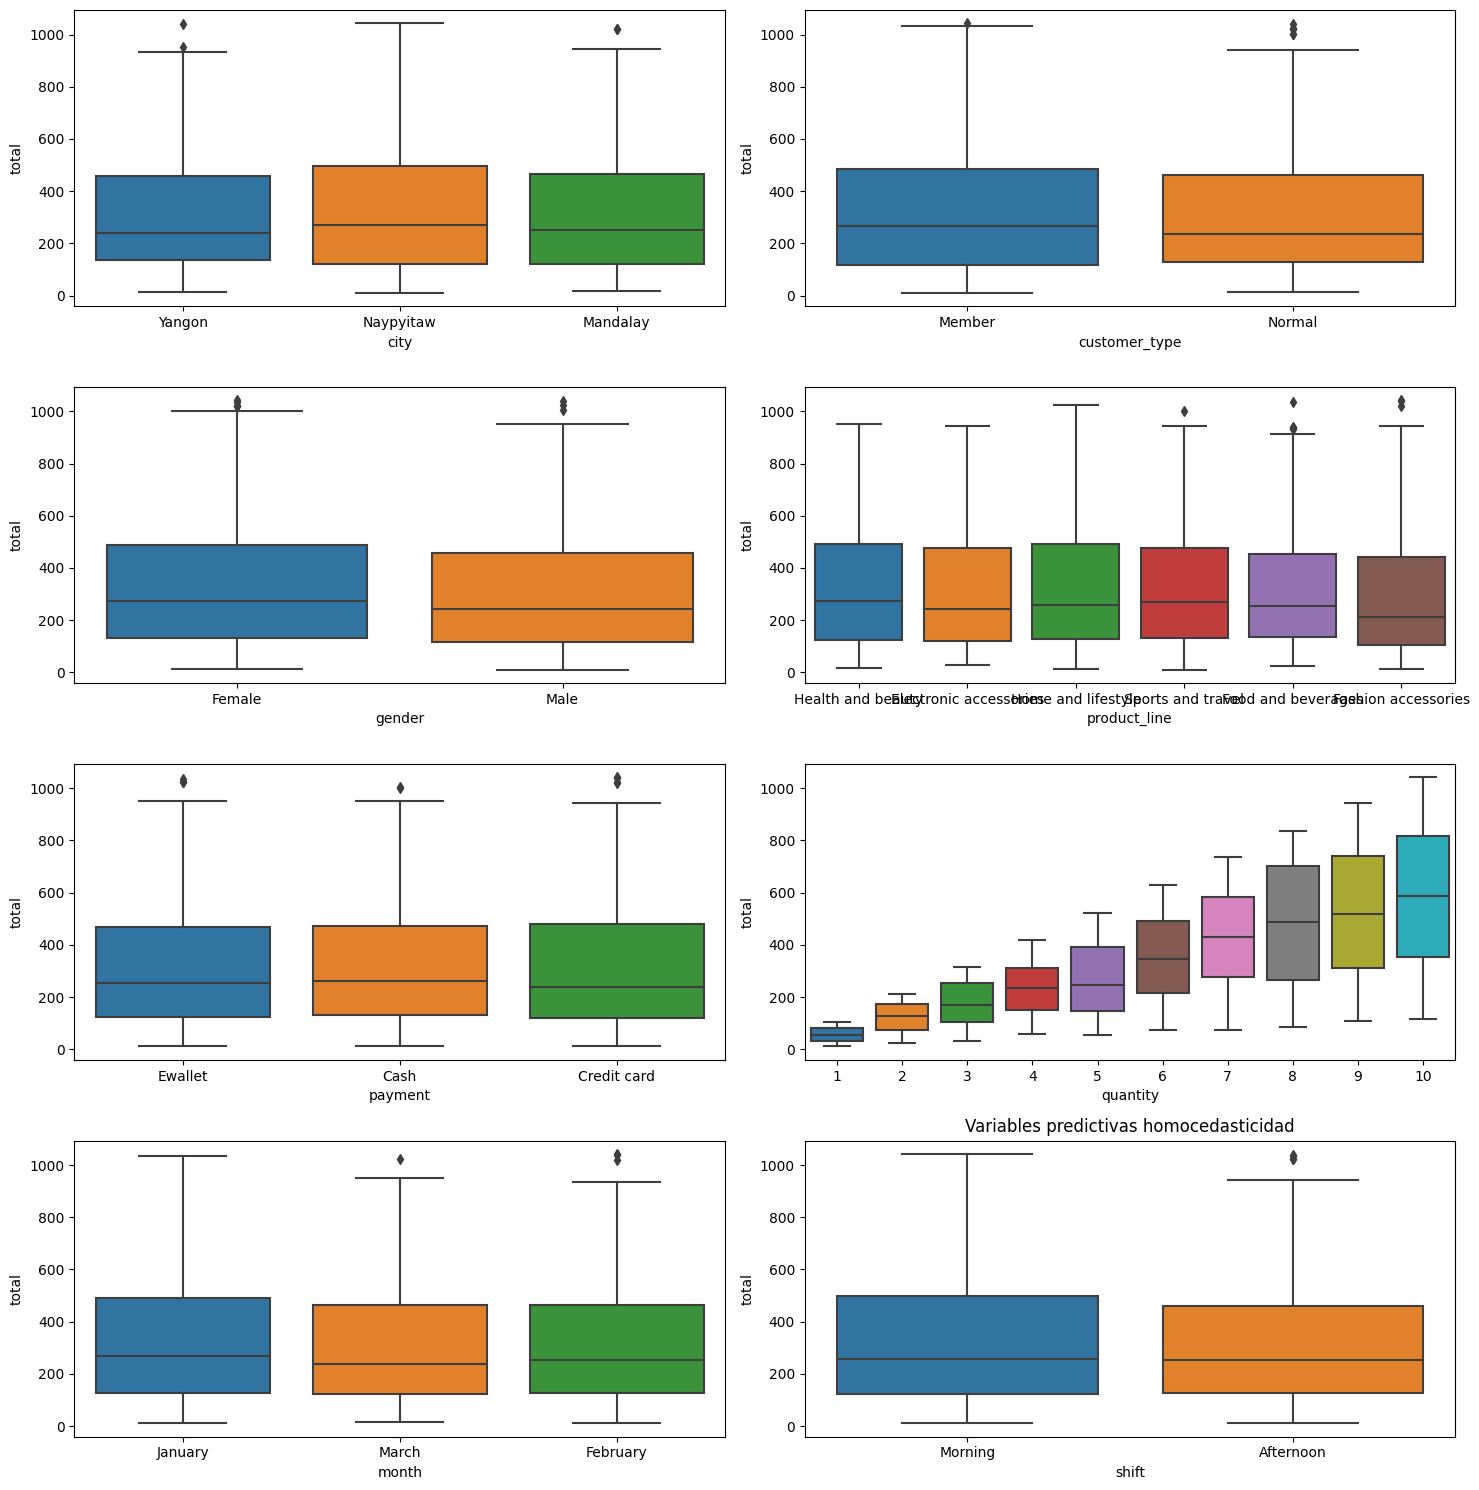

In [6]:
#Visual

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flat

lista_super = ['city', 'customer_type', 'gender', 'product_line',  'payment', 'quantity', 'month', 'shift']

for indice, elemento in enumerate(lista_super):
    sns.boxplot(x = elemento, y = 'total', data = df, ax=axes[indice], palette = 'tab10')

plt.title('Variables predictivas homocedasticidad')

plt.tight_layout()
plt.show()

<Axes: xlabel='unit_price', ylabel='total'>

<Axes: xlabel='rating', ylabel='total'>

Text(0.5, 1.0, 'Variables predictivas numéricas homocedasticidad')

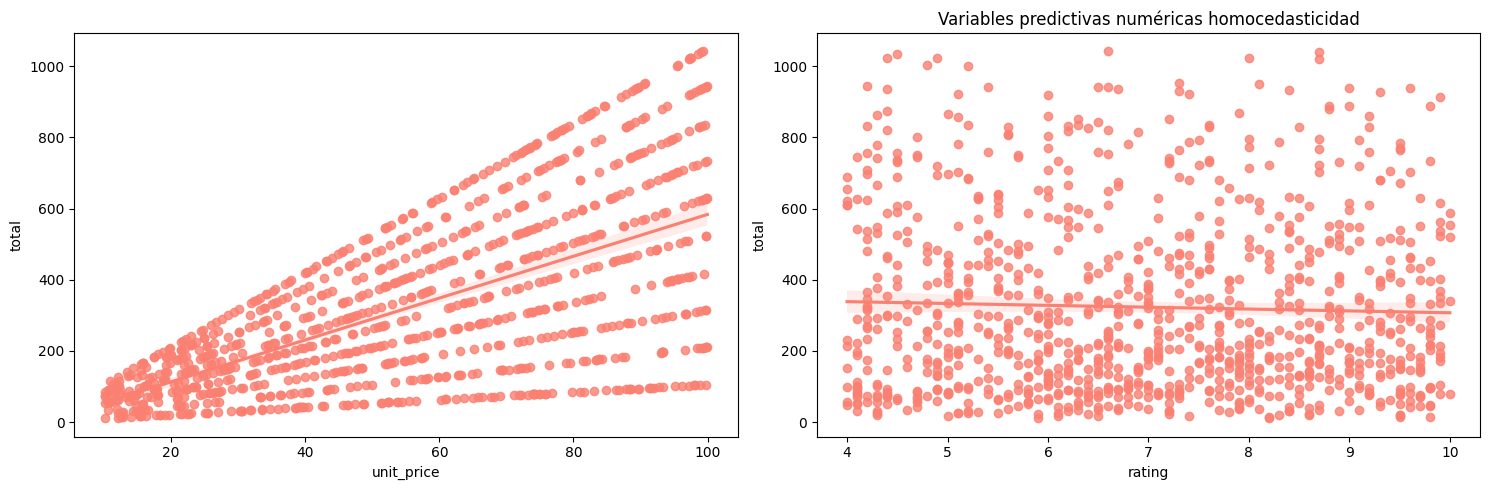

In [7]:
#Visual

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flat

lista_super_num = ['unit_price','rating']

for indice, elemento in enumerate(lista_super_num):
    sns.regplot(x = elemento, y = 'total', data = df, ax=axes[indice], color = "salmon")

plt.title('Variables predictivas numéricas homocedasticidad')

plt.tight_layout()
plt.show()

De manera visual podemos observar que nuestras variables categóricas son homocedásticas, a excepción de la variable "quantity".

En cambio, en nuestras variables numéricas sólo la variable "unit_price" no es homocedástica.

In [8]:
#Analítica
#Test de Levene, elegimos este método ya que nuestros datos no son normales.

In [9]:
#creamos una lista vacía
lista_df =[]

#sacamos un df por cada tipo de product_line que tenemos, y nos quedamos solamente con la columna quantity, y metemos estos df dentro de una lista.
for elemento in df["product_line"].unique():
    df1 = df[df["product_line"] == elemento ]['total']
    lista_df.append(df1)

In [10]:
#pasamos el test de Levene para cada categoría de product_line
levene_test = stats.levene(lista_df[0], lista_df[1], lista_df[2], lista_df[3], lista_df[4], lista_df[5], center='median')
levene_test

LeveneResult(statistic=0.18201468318342898, pvalue=0.9694180536193773)

El p-value es mayor de 0.05, lo que nos indica que la relación entre el total y la línea de producto es homocedástica. 

In [11]:
def subcategorias (df, col):
    lista_df =[]

    #sacamos un df por cada tipo de product_line que tenemos, y nos quedamos solamente con la columna quantity, y metemos estos df dentro de una lista.
    for elemento in df[col].unique():
        df1 = df[df[col] == elemento ]['total']
        lista_df.append(df1)
        
    return lista_df

In [12]:
city = subcategorias(df, "city")
levene_test = stats.levene(city[0], city[1], city[2], center='median')
levene_test

LeveneResult(statistic=2.419770080100636, pvalue=0.08946425577002974)

Entre las variables total y city, también hay homocedasticidad porque el valor es mayor a 0.05

In [13]:
customer = subcategorias(df, "customer_type")
levene_test = stats.levene(customer[0], customer[1], center='median')
levene_test

LeveneResult(statistic=0.3379592132814284, pvalue=0.5611408477600044)

Entre las variables total y customer_type el valor también es mayor a 0.05 por lo que existe homocedasticidad

In [14]:
gender = subcategorias(df, "gender")
levene_test = stats.levene(gender[0], gender[1], center='median')
levene_test

LeveneResult(statistic=0.9054791899266308, pvalue=0.34154716602764346)

Entre las variables total y gender el valor también es mayor a 0.05 por lo que existe homocedasticidad

In [15]:
quantity = subcategorias(df, "quantity")

levene_test = stats.levene(quantity[0], quantity[1], quantity[2], quantity[3], quantity[4], quantity[5], quantity[6], quantity[7], quantity[8], quantity[9],center='median')
levene_test

LeveneResult(statistic=78.39976229161954, pvalue=2.336681448212872e-109)

Entre las variables total y quantity, también hay homocedasticidad porque el valor es mayor a 0.05

In [16]:
payment = subcategorias(df, "payment")
levene_test = stats.levene(payment[0], payment[1], payment[2], center='median')
levene_test

LeveneResult(statistic=0.5125358011628091, pvalue=0.5991325030539134)

Entre las variables total y payment, también hay homocedasticidad porque el valor es mayor a 0.05

In [17]:
month = subcategorias(df, "month")
levene_test = stats.levene(month[0], month[1], month[2], center='median')
levene_test

LeveneResult(statistic=0.22547438296361144, pvalue=0.7981781932388169)

Entre las variables total y month, también hay homocedasticidad porque el valor es mayor a 0.05

In [18]:
shift = subcategorias(df, "shift")
levene_test = stats.levene(shift[0], shift[1], center='median')
levene_test

LeveneResult(statistic=1.6524662061572402, pvalue=0.19892180927787423)

Entre las variables total y shift, también hay homocedasticidad porque el valor es mayor a 0.05

In [19]:
stats.levene(df["unit_price"], df.total, center='median')


LeveneResult(statistic=1088.034755927951, pvalue=7.26181955815485e-191)

In [20]:
stats.levene(df["rating"], df.total, center='median')

LeveneResult(statistic=1385.3977265045248, pvalue=8.248082173683168e-231)

Ambas columnas numéricas (unit_price y rating) no son homocedásticas, ya que su p-value está muy por debajo de 0.05, a pesar de que visualmente podíamos pensar que rating sí era homocedástica.

#### Independencia

In [21]:
#Analítica (Test chi-cuadrado)

crosstab, test_results, expected = rp.crosstab(df["customer_type"], df["gender"],
                                            test= "chi-square",
                                            expected_freqs= True,
                                            prop= "cell")

In [22]:
crosstab.head()

gender             
gender        Female  Male    All
customer_type                    
Member          26.1  24.0   50.1
Normal          24.0  25.9   49.9
All             50.1  49.9  100.0

Según los resultados, el p-value es mayor de 0.05, lo que indica que nuestras variables son independientes.
Basándonos en los resultados de Cramer's phi, el valor es muy cercano a 0, lo que indica igualmente que nuestras variables son independientes.

In [23]:
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,total,date,time,payment,rating,month,shift
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,9.1,January,Morning
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,9.6,March,Morning
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,7.4,March,Morning
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,8.4,January,Afternoon
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,5.3,February,Morning


In [24]:
predictoras = df.select_dtypes(include = 'object')
predictoras.head(1)

,city,customer_type,gender,product_line,time,payment,month,shift
0,Yangon,Member,Female,Health and beauty,13:08,Ewallet,January,Morning


In [25]:
predictoras = predictoras.drop(['invoice_id', 'date', 'time'], axis = 1)
#eliminamos columnas que no nos aportan ninguna información para el crosstab.

KeyError: "['invoice_id', 'date'] not found in axis"

In [ ]:
combinaciones = list(combinations(predictoras, 2))

In [ ]:
combinaciones

[('city', 'customer_type'),
 ('city', 'gender'),
 ('city', 'product_line'),
 ('city', 'payment'),
 ('customer_type', 'gender'),
 ('customer_type', 'product_line'),
 ('customer_type', 'payment'),
 ('gender', 'product_line'),
 ('gender', 'payment'),
 ('product_line', 'payment')]

In [ ]:
for i in combinaciones:
    rp.crosstab(df[i[0]], df[i[1]])

customer_type             
customer_type        Member Normal   All
city                                    
Mandalay                165    167   332
Naypyitaw               169    159   328
Yangon                  167    173   340
All                     501    499  1000

gender           
gender    Female Male   All
city                       
Mandalay     162  170   332
Naypyitaw    178  150   328
Yangon       161  179   340
All          501  499  1000

product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
city                                                                         
Mandalay                         55                  62                 50   
Naypyitaw                        55                  65                 66   
Yangon                           60                  51                 58   
All                             170                 178                174   

                                                                           
product_line Health and beauty Home and lifestyle Sports and travel   All  
city                                                                       
Mandalay                    53                 50                62   332  
Naypyitaw                   52                 45                45   328  
Yangon                      47                 65                59   340  
All                        152                160               166  1000

payment                          
payment      Cash Credit card Ewallet   All
city                                       
Mandalay      110         109     113   332
Naypyitaw     124          98     106   328
Yangon        110         104     126   340
All           344         311     345  1000

gender           
gender        Female Male   All
customer_type                  
Member           261  240   501
Normal           240  259   499
All              501  499  1000

product_line                                         \
product_line  Electronic accessories Fashion accessories Food and beverages   
customer_type                                                                 
Member                            78                  86                 94   
Normal                            92                  92                 80   
All                              170                 178                174   

                                                                            
product_line  Health and beauty Home and lifestyle Sports and travel   All  
customer_type                                                               
Member                       73                 83                87   501  
Normal                       79                 77                79   499  
All                         152                160               166  1000

payment                          
payment          Cash Credit card Ewallet   All
customer_type                                  
Member            168         172     161   501
Normal            176         139     184   499
All               344         311     345  1000

product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
gender                                                                       
Female                           84                  96                 90   
Male                             86                  82                 84   
All                             170                 178                174   

                                                                           
product_line Health and beauty Home and lifestyle Sports and travel   All  
gender                                                                     
Female                      64                 79                88   501  
Male                        88                 81                78   499  
All                        152                160               166  1000

payment                          
payment    Cash Credit card Ewallet   All
gender                                   
Female      178         163     160   501
Male        166         148     185   499
All         344         311     345  1000

payment                          
payment                   Cash Credit card Ewallet   All
product_line                                            
Electronic accessories      71          46      53   170
Fashion accessories         57          56      65   178
Food and beverages          57          61      56   174
Health and beauty           49          50      53   152
Home and lifestyle          51          45      64   160
Sports and travel           59          53      54   166
All                        344         311     345  1000

In [ ]:
for i in combinaciones:
        crosstab, test_results = rp.crosstab(df[i[0]], df[i[1]],
                                        test= "chi-square",
                                        prop= "cell")
        display(crosstab)
        print(test_results)

customer_type              
customer_type        Member Normal    All
city                                     
Mandalay               16.5   16.7   33.2
Naypyitaw              16.9   15.9   32.8
Yangon                 16.7   17.3   34.0
All                    50.1   49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.4188
1                    p-value =    0.8111
2                 Cramer's V =    0.0205


gender             
gender    Female  Male    All
city                         
Mandalay    16.2  17.0   33.2
Naypyitaw   17.8  15.0   32.8
Yangon      16.1  17.9   34.0
All         50.1  49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    3.5320
1                    p-value =    0.1710
2                 Cramer's V =    0.0594


product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
city                                                                         
Mandalay                        5.5                 6.2                5.0   
Naypyitaw                       5.5                 6.5                6.6   
Yangon                          6.0                 5.1                5.8   
All                            17.0                17.8               17.4   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
city                                                                        
Mandalay                   5.3                5.0               6.2   33.2  
Naypyitaw                  5.2                4.5               4.5   32.8  
Yangon                     4.7                6.5               5.9   34.0  
All                       15.2               16.0              16.6  100.0

                 Chi-square test  results
0  Pearson Chi-square ( 10.0) =   11.5594
1                     p-value =    0.3156
2                  Cramer's V =    0.0760


payment                           
payment      Cash Credit card Ewallet    All
city                                        
Mandalay     11.0        10.9    11.3   33.2
Naypyitaw    12.4         9.8    10.6   32.8
Yangon       11.0        10.4    12.6   34.0
All          34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =    3.2997
1                    p-value =    0.5090
2                 Cramer's V =    0.0406


gender             
gender        Female  Male    All
customer_type                    
Member          26.1  24.0   50.1
Normal          24.0  25.9   49.9
All             50.1  49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.5997
1                    p-value =    0.2059
2               Cramer's phi =    0.0400


product_line                                         \
product_line  Electronic accessories Fashion accessories Food and beverages   
customer_type                                                                 
Member                           7.8                 8.6                9.4   
Normal                           9.2                 9.2                8.0   
All                             17.0                17.8               17.4   

                                                                             
product_line  Health and beauty Home and lifestyle Sports and travel    All  
customer_type                                                                
Member                      7.3                8.3               8.7   50.1  
Normal                      7.9                7.7               7.9   49.9  
All                        15.2               16.0              16.6  100.0

                Chi-square test  results
0  Pearson Chi-square ( 5.0) =    3.3250
1                    p-value =    0.6500
2                 Cramer's V =    0.0577


payment                           
payment          Cash Credit card Ewallet    All
customer_type                                   
Member           16.8        17.2    16.1   50.1
Normal           17.6        13.9    18.4   49.9
All              34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    5.2170
1                    p-value =    0.0736
2                 Cramer's V =    0.0722


product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
gender                                                                       
Female                          8.4                 9.6                9.0   
Male                            8.6                 8.2                8.4   
All                            17.0                17.8               17.4   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
gender                                                                      
Female                     6.4                7.9               8.8   50.1  
Male                       8.8                8.1               7.8   49.9  
All                       15.2               16.0              16.6  100.0

                Chi-square test  results
0  Pearson Chi-square ( 5.0) =    5.7445
1                    p-value =    0.3319
2                 Cramer's V =    0.0758


payment                           
payment    Cash Credit card Ewallet    All
gender                                    
Female     17.8        16.3    16.0   50.1
Male       16.6        14.8    18.5   49.9
All        34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.9497
1                    p-value =    0.2288
2                 Cramer's V =    0.0543


payment                           
payment                   Cash Credit card Ewallet    All
product_line                                             
Electronic accessories     7.1         4.6     5.3   17.0
Fashion accessories        5.7         5.6     6.5   17.8
Food and beverages         5.7         6.1     5.6   17.4
Health and beauty          4.9         5.0     5.3   15.2
Home and lifestyle         5.1         4.5     6.4   16.0
Sports and travel          5.9         5.3     5.4   16.6
All                       34.4        31.1    34.5  100.0

                 Chi-square test  results
0  Pearson Chi-square ( 10.0) =    8.7214
1                     p-value =    0.5587
2                  Cramer's V =    0.0660


Analizando las diferentes crosstab, observamos que todas nuestras variable categóricas son independientes entre sí ya que en el test de Cramer tienen valores muy cercanos a 0.